# Lab 2 - Probability, Distributions, and Statistical Questions

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 10/18/2021
##### By Erik Solhaug
<br>

In this lab, we will look at the use of convolutions and methods to convolve and use averages to filter signals in useful ways.

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30

## Problem 1

**In lecture and homework we explored how the convolution can be used to calculate the probability of a sum or average. For this problem we are going to imagine that we are looking for gamma-ray sources (e.g. with the Fermi telescope). In this kind of telescope there is a background of cosmic-rays (electrons and protons, mostly) that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma-ray source, you need to ask what is the probability that the cosmic-ray background would have given you a measurement as signal-like or more than the signal that you received.**

**To set up the problem, assume in 1 day the average cosmic-ray background is some number X (pick someting btwn 0.5 and 10, with different values for you and your lab partner); and the average number of gamma-rays emitted by your hypothetical source is Y (pick something larger than X).**

In this problem, we will imagine that we are observing gamma-ray sources with a telescope, and that there is some incoming background noise from cosmic rays. This background is represented by a Poisson distribution. 

## A)

**Show how the probability distribution of the background changes as you integrate (sum) for more days.**

First, let's take a look at the background distribution - a Poisson distribution. Here we show that by summing over this distribution repeatedly, the summed (or integrated) distribution will change. Thus, also the background will change if we sum over a background in the same manner.

For our Poisson distribution, we pick the value $\mu = 5$ to be the number of expected incoming cosmic-rays in one day.

In [88]:
mu = 5
xlim1, xlim2 = (0, 20)
xaxis = np.linspace(xlim1, xlim2, 1000)
pmf1 = stats.poisson.pmf(mu, xaxis)
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 99.89287113338035)

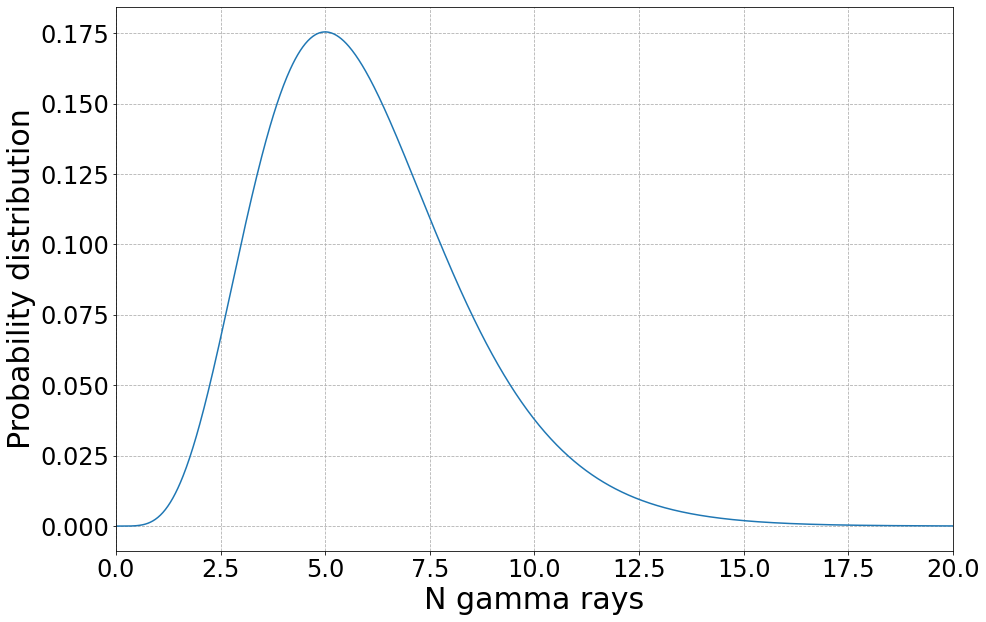

In [89]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(xaxis, pmf1)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Probability distribution', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

In [142]:
num_sum = 1
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
# x2 = np.linspace(xlim1, xlim2*(num_sum+1), 1000)/(num_sum+1)
# x2 = np.linspace(xlim1 + mu, xlim2 + mu, 1000)/(num_sum+1)
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean as we divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 99.89287113338035)

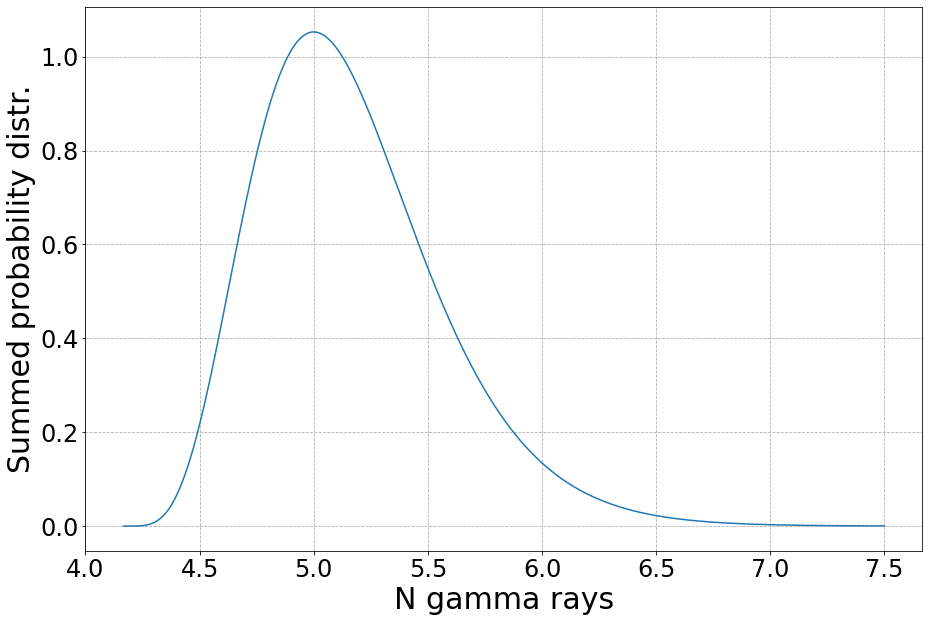

In [149]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We can sum many times... (keep in mind that since the distribution is not centered on zero, we need to shift the distribution so that its mean is still at $\mu$)

In [150]:
num_sum = 10
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
# x2 = np.linspace(xlim1, xlim2*(num_sum+1), 1000)/(num_sum+1)
# x2 = np.linspace(xlim1 + mu, xlim2 + mu, 1000)/(num_sum+1)
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 549.410791233593)

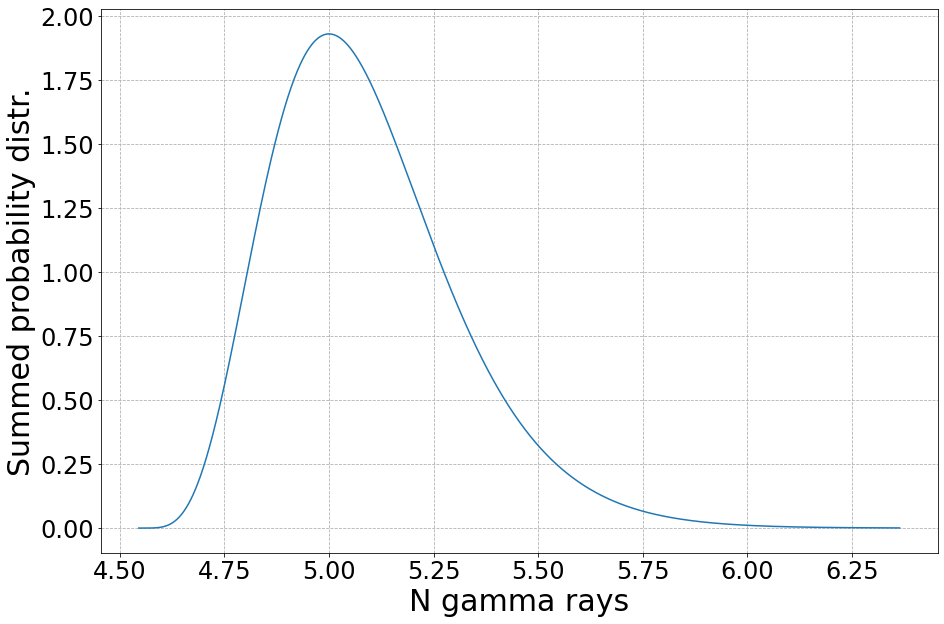

In [151]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We see that as we sum and average the background with itself over and over, the standard deviation becomes smaller and the distribution more narrow.

## B)

**Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.**

For example, after the standard deviation of the distribution is smaller. And this, as we show below, is still a Poisson distribution. 

In [156]:
num_sum = 5
pmf2 = pmf1
for num in range(0, num_sum):
    pmf2 = pmf2 + pmf1
x2 = (np.linspace(xlim1, xlim2, len(pmf2)) + mu*num_sum)/(num_sum+1) # We need to shift the distribution back to where it is supposed to have its mean and divide by the number of summed distributions
x2.size, pmf2.size, sum(pmf2)

(1000, 1000, 299.67861340014014)

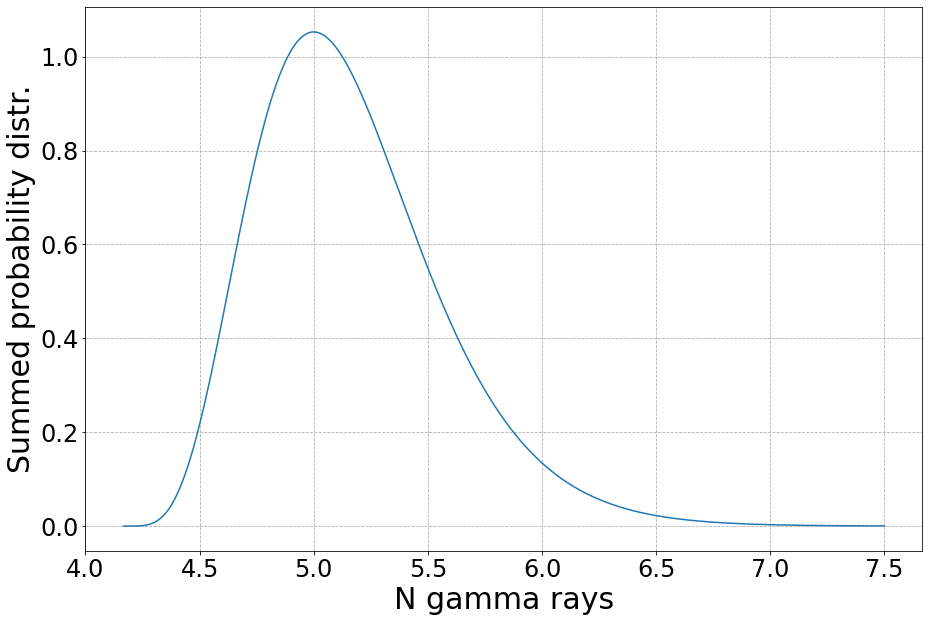

In [157]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.plot(x2, pmf2)
#ax.stairs(stats.poisson.pmf(k, mu), bins, fill=True)
#ax.set_xlim([xaxis[0], xaxis[-1]])
ax.set_xlabel('N gamma rays', fontsize = fsize)
ax.set_ylabel('Summed probability distr.', fontsize = fsize)
ax.grid(linestyle='--')
plt.show()

We can see that the distribution has retained its characteristic shape of a Poisson distribution. This makes sense conceptually because since the Poisson distribution describes the rate of occurring events then we should expect the distribution to retain its shape even though the time span of the observation expands. 

Mathematically speaking, we are adding several equal Poisson distribution in the form:
$$ \frac{\lambda^{x}}{x!} e^{-\lambda} $$
Which is essentially a linear combination of the above expression. Thus, it also makes sense mathematically that the distribution remains a Poisson distribution.

## C)

**Show how the probability distribution evolves as you average days. Calculate for many different ranges of days, and explore the shape of the distribution as the number of days becomes larger. Discuss this in relation to both B) and the central limit theoem.**

## D)

**Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]**

## Problem 2

**Pick a skewed continuous distribtuion, such as a Rayleigh, that describes your background over some observing interval.**

## A)

**Show how the distribution changes as you average over more observing intervals.**

## B)

**Discuss how the shape changes. Does it approach a Gaussian distribution? If yes, after how many intervals?**

## Problem 3

**The discovery of optical/infra-red counterparts of Neutron star mergers initially detected with gravity-waves is one of the great discoverys in the last few years (wikipedia, scientific paper), and has ushered in the age of "multi-messenger astrophysics." The science that can be done by matching a gravity-wave signal (directly measures the mass of the neutron stars and their distance) with the optical emisson (redshift, nuclear astrophysics of the resulting explosion) is staggering. Lots of science from how the heaviest elements are formed to constraints on Dark Energy.**

**We're going to explore one of the analysis questions that comes up when looking for the optical counterparts (a new optical source) of a gravity wave signal. For this problem let's assume that we are using an optical telescope with a thermal noise background from the CCD (dark current, particularly an issue with older CCDs and/or infra-red CCDs). After flat-fielding, the background appears as a zero-mean Gaussian with constant width over the image.**

## Version 1

**You have an alert from LIGO that is also seen in with the X-ray/ultra-violet satellite SWIFT. SWIFT gives you a very precise location, so you take an image of that part of the sky. But because of SWIFT's accuracy, you know which pixel in your image to look for a counterpart in.**

## A)

**From looking at all the other pixels in your image, you can measure the width of the background Gaussian distribution X (pick something). Assuming you see a signal of strength Y (pick a floating-point number; optical CCDs are not sensitive enough to count photons so the readings are floating point brightnesses, not integer photons). Calculate the significance of your detection. Can you claim a discovery (traditionally 5-sigma or more)?**

## Version 2

**You have an alert from LIGO, but no associated detection from SWIFT. This could be because it is a black hole-black hole merger, a black hole-neutron star merger (neither seem to emit X-rays or UV light), or it could because SWIFT was indisposed at the time (wrong side of the earth in its orbit). Whatever the cause, you know what region of the sky to look in, but not which pixel.**

## B)

**If you have to look for a signal in 10k pixels, what is the probability distribution of your background? (Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)**

## C)

**Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.**

## Problem 4

**The statistical issue we were exploring in the previous problem is called a trials factor (sometimes known as a look-elsewhere effect). This is an important effect, as if you search through a million locations, you would expect to se ~1 one in a million event. However, it is also often over estimated how big an impact this makes on the sensitivity of a search. So in this part of the lab we are going to invert the problem.**

**Let us again assume we have a Gaussian background (same parameters as Problem 3).**

## A)

**Calculate the signal required for a 5-sigma detection in Version 1**

## B)

**Calculate the signal required for a 5-sigma detection in Version 2**

## C)

**Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k. Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.**

## D)

**If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?**

**Extra credit: If you had a different distribution shape (non-Gaussian), how would that affect the sensitivity penalty of many trials? Clearly explain.**